Importing the libraries needed for the code

In [ ]:
import pandas
import numpy as np
import sklearn
import matplotlib.pyplot as pp
import matplotlib
from sklearn.model_selection import train_test_split
import math
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import GridSearchCV



Attaining the data

In [ ]:
data = pandas.read_csv('/content/SVMdataset.csv')
x1 = data['x1']
x2 = data['x2']
y = data['y']

x1 = pandas.DataFrame.to_numpy(x1)
x2 = pandas.DataFrame.to_numpy(x2)
y = pandas.DataFrame.to_numpy(y)



Splitting the Data

In [ ]:
x1_train, x1_temp, x2_train, x2_temp, y_train, y_temp = train_test_split(x1 , x2 , y, test_size=0.40)
x1_cross, x1_test, x2_cross, x2_test, y_cross, y_test = train_test_split(x1_temp , x2_temp , y_temp, test_size=0.20)

Plotting the data

Text(0.5, 1.0, 'cross validation data')

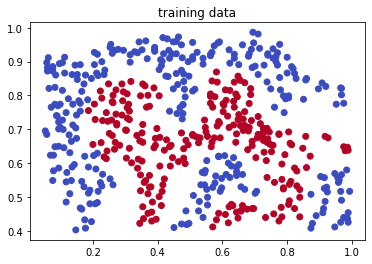

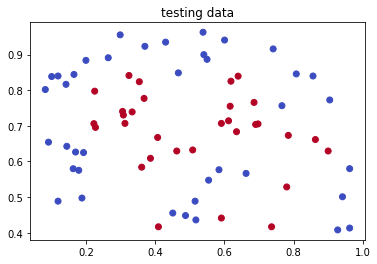

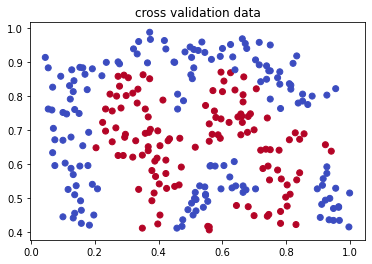

In [ ]:
trainFigure = pp.figure()
testFigure = pp.figure()
crossFigure = pp.figure()

trainpp = trainFigure.add_subplot(111)
testpp = testFigure.add_subplot(111)
crosspp = crossFigure.add_subplot(111)

trainpp.scatter(x1_train, x2_train, c=-y_train, cmap=pp.cm.coolwarm)
trainpp.set_title('training data')
testpp.scatter(x1_test, x2_test, c=-y_test, cmap=pp.cm.coolwarm)
testpp.set_title('testing data')
crosspp.scatter(x1_cross, x2_cross, c=-y_cross, cmap=pp.cm.coolwarm)
crosspp.set_title('cross validation data')


Concatenating the data


In [ ]:
# concatenating X train
xtrain = np.array((x1_train,x2_train))
xtest = np.array((x1_test,x2_test))
xcross = np.array((x1_cross,x2_cross))

xtrain = np.transpose(xtrain)
xtest = np.transpose(xtest)
xcross = np.transpose(xcross)




creating the linear svc classefier, testing it to find the value of C 


In [ ]:

C = [0.01,0.08, 0.1,	0.5 ,1, 3, 4, 8, 12, 16,20]
max_c = 0
max_f1 = 0
for i in C:
  lsvc = SVC(kernel='linear',C=i)
  lsvc.fit(xcross,y_cross)
  y_predict = lsvc.predict(xtest)
  f1 = metrics.f1_score(y_test,y_predict)
  if f1>max_f1:
    max_f1=f1
    max_c=i
  print(f1 )
print(max_c,max_f1)

0.7155963302752294
0.7155963302752294
0.7155963302752294
0.7155963302752294
0.7155963302752294
0.7155963302752294
0.7155963302752294
0.7155963302752294
0.7155963302752294
0.7155963302752294
0.7155963302752294
5 0.7155963302752294


Linear svc using gridsearch

{'C': 0.001}


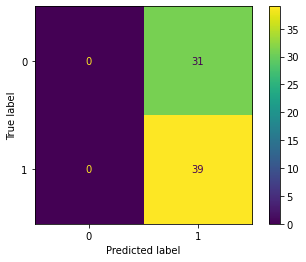

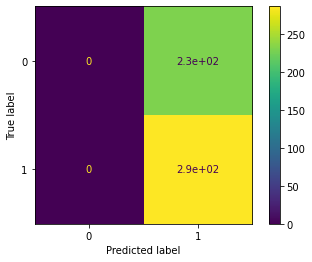

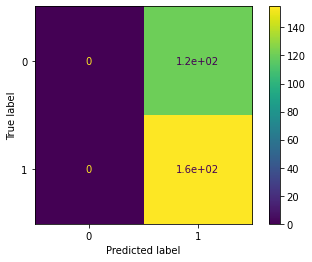

In [ ]:
parameters = { 'C':[5,0.001,0.08, 0.1,	0.5 , 3, 4, 8, 12, 16,20]}
svcclf = SVC(kernel='linear')
gridclf = GridSearchCV(svcclf, parameters)
gridclf.fit(xcross,y_cross)
print(gridclf.best_params_)


y_predict_test = gridclf.predict(xtest)
y_predict_train = gridclf.predict(xtrain)
y_predict_cross = gridclf.predict(xcross)

plot_confusion_matrix(gridclf,xtest,y_test)
plot_confusion_matrix(gridclf,xtrain,y_train)
plot_confusion_matrix(gridclf,xcross,y_cross)

applying the training the model using the best value of C and plotting the confusion matrix

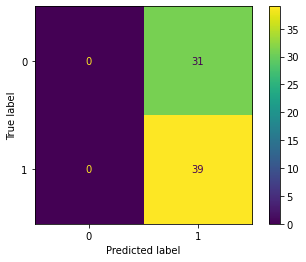

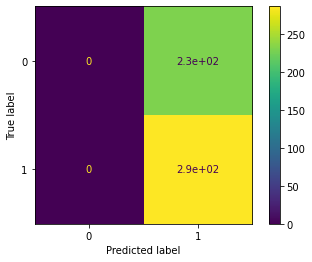

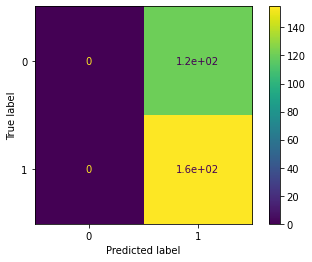

In [ ]:
lsvc = SVC(kernel ='linear',C=max_c)
lsvc.fit(xtrain,y_train)
y_predict_test = lsvc.predict(xtest)
y_predict_train = lsvc.predict(xtrain)
y_predict_cross = lsvc.predict(xcross)

plot_confusion_matrix(lsvc,xtest,y_test)
plot_confusion_matrix(lsvc,xtrain,y_train)
plot_confusion_matrix(lsvc,xcross,y_cross)



printing F1 score for each dataser

In [ ]:
f1train = metrics.f1_score(y_train,y_predict_train)
f1test = metrics.f1_score(y_test,y_predict_test)
f1cross = metrics.f1_score(y_cross,y_predict_cross)

pre_train = metrics.precision_score(y_train,y_predict_train)
pre_test = metrics.precision_score(y_test,y_predict_test)
pre_cross = metrics.precision_score(y_cross,y_predict_cross)

recall_train = metrics.recall_score(y_train,y_predict_train)
recall_test = metrics.recall_score(y_test,y_predict_test)
recall_cross = metrics.recall_score(y_cross,y_predict_cross)

print('f1 score for training data = ' + str(f1train))
print('f1 score for testing data = ' + str(f1test))
print('f1 score for cross validation data = ' + str(f1cross))
print("")
print('precision score for training data = ' + str(pre_train))
print('precision score for testing data = ' + str(pre_test))
print('precision score for cross validation data = ' + str(pre_cross))
print("")
print('recall score for training data = ' + str(recall_train))
print('recall score for testing data = ' + str(recall_test))
print('recall score for cross validation data = ' + str(recall_cross))



f1 score for training data = 0.7123287671232876
f1 score for testing data = 0.7155963302752294
f1 score for cross validation data = 0.7192575406032483

precision score for training data = 0.5531914893617021
precision score for testing data = 0.5571428571428572
precision score for cross validation data = 0.5615942028985508

recall score for training data = 1.0
recall score for testing data = 1.0
recall score for cross validation data = 1.0


linear svm decision boundary training data

Text(0.5, 1.0, 'decision boundary for training data')

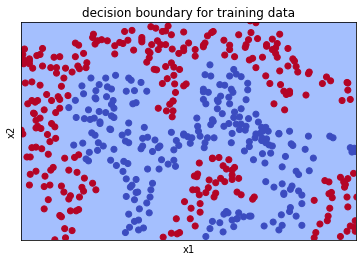

In [ ]:
#creating the meshgrid by finding specifing the minimum and maximum values of both x1 and x2
x1_min, x1_max = x1_train.min() , x1_train.max() 
x2_min, x2_max = x2_train.min() , x2_train.max() 
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max,0.02),np.arange(x2_min, x2_max,0.02))
predict = lsvc.predict(np.c_[xx1.ravel(), xx2.ravel()])
predict = predict.reshape(xx1.shape)
#creating the regions using countor lines
pp.contourf(xx1,xx2 ,predict, cmap=pp.cm.coolwarm, alpha=0.8)
#scattering the testing data
pp.scatter(x1_train, x2_train, c=y_train, cmap=pp.cm.coolwarm)
pp.xlabel('x1')
pp.ylabel('x2')
pp.xlim(xx1.min(), xx1.max())
pp.ylim(xx2.min(), xx2.max())
pp.xticks(())
pp.yticks(())
pp.title('decision boundary for training data')

Creating the gaussian model 

In [ ]:
parameters = { 'C':[0.01,0.08, 0.1,	0.5 , 3, 4, 8, 12, 16,20], 
              'gamma':[0.1,0.2,0.5,1,2,3,5,10,12,16]}
svcclf = SVC(kernel='rbf')
gridclf = GridSearchCV(svcclf, parameters)
gridclf.fit(xcross,y_cross)
y_predict_test2 = gridclf.predict(xtest) 
y_predict_train2 = gridclf.predict(xtrain) 
y_predict_cross2 = gridclf.predict(xcross) 

print('the best values of C and gamma are: ')
print(gridclf.best_params_)
print("")

f1test2 = metrics.f1_score(y_test,y_predict_test2)
f1train2 = metrics.f1_score(y_train,y_predict_train2)
f1cross2 = metrics.f1_score(y_cross,y_predict_cross2)


pre_train2 = metrics.precision_score(y_train,y_predict_train)
pre_test2 = metrics.precision_score(y_test,y_predict_test)
pre_cross2 = metrics.precision_score(y_cross,y_predict_cross)

recall_train2 = metrics.recall_score(y_train,y_predict_train)
recall_test2 = metrics.recall_score(y_test,y_predict_test)
recall_cross2 = metrics.recall_score(y_cross,y_predict_cross)

print('f1 score for training data = '+str(f1test2))
print('f1 score for testing data = ' + str(f1test2))
print('f1 score for cross validation data = ' + str(f1cross2))
print("")
print('precision score for training data = ' + str(pre_train2))
print('precision score for testing data = ' + str(pre_test2))
print('precision score for cross validation data = ' + str(pre_cross2))
print("")
print('recall score for training data = ' + str(recall_train2))
print('recall score for testing data = ' + str(recall_test2))
print('recall score for cross validation data = ' + str(recall_cross2))



the best values of C and gamma are: 
{'C': 20, 'gamma': 16}

f1 score for training data = 0.9736842105263158
f1 score for testing data = 0.9736842105263158
f1 score for cross validation data = 0.9803921568627451

precision score for training data = 0.5531914893617021
precision score for testing data = 0.5571428571428572
precision score for cross validation data = 0.5615942028985508

recall score for training data = 1.0
recall score for testing data = 1.0
recall score for cross validation data = 1.0


plotting the confusion matricies for the gaussian model

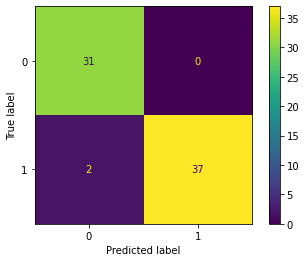

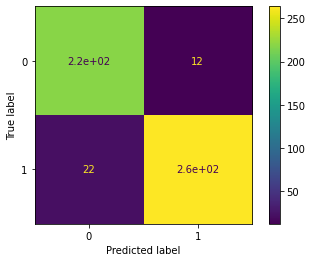

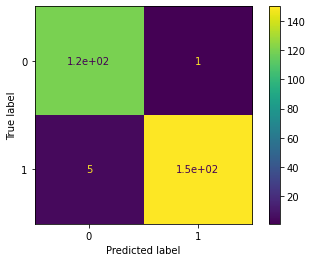

In [ ]:
plot_confusion_matrix(gridclf,xtest,y_test)
plot_confusion_matrix(gridclf,xtrain,y_train)
plot_confusion_matrix(gridclf,xcross,y_cross)

plotting the rbf decision boundaries for testing data

Text(0.5, 1.0, 'decision boundary for testing data')

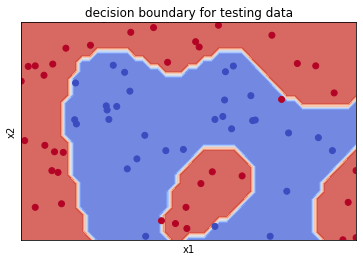

In [ ]:
#creating the meshgrid by finding specifing the minimum and maximum values of both x1 and x2
x1_min, x1_max = x1_test.min() , x1_test.max() 
x2_min, x2_max = x2_test.min() , x2_test.max() 
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max,0.02),np.arange(x2_min, x2_max,0.02))
predict = gridclf.predict(np.c_[xx1.ravel(), xx2.ravel()])
predict = predict.reshape(xx1.shape)
#creating the regions using countor lines
pp.contourf(xx1,xx2 ,predict, cmap=pp.cm.coolwarm, alpha=0.8)
#scattering the testing data
pp.scatter(x1_test, x2_test, c=y_test, cmap=pp.cm.coolwarm)
pp.xlabel('x1')
pp.ylabel('x2')
pp.xlim(xx1.min(), xx1.max())
pp.ylim(xx2.min(), xx2.max())
pp.xticks(())
pp.yticks(())
pp.title('decision boundary for testing data')

rbf decision boundary for training data

Text(0.5, 1.0, 'decision boundary for training data')

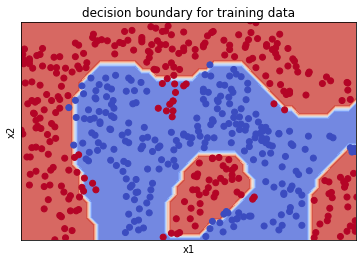

In [ ]:
#creating the meshgrid by finding specifing the minimum and maximum values of both x1 and x2
x1_min, x1_max = x1_train.min() , x1_train.max() 
x2_min, x2_max = x2_train.min() , x2_train.max() 
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max,0.02),np.arange(x2_min, x2_max,0.02))
predict = gridclf.predict(np.c_[xx1.ravel(), xx2.ravel()])
predict = predict.reshape(xx1.shape)
#creating the regions using countor lines
pp.contourf(xx1,xx2 ,predict, cmap=pp.cm.coolwarm, alpha=0.8)
#scattering the testing data
pp.scatter(x1_train, x2_train, c=y_train, cmap=pp.cm.coolwarm)
pp.xlabel('x1')
pp.ylabel('x2')
pp.xlim(xx1.min(), xx1.max())
pp.ylim(xx2.min(), xx2.max())
pp.xticks(())
pp.yticks(())
pp.title('decision boundary for training data')

rbf decision boundary for croos validation data

Text(0.5, 1.0, 'decision boundary for cross validation data')

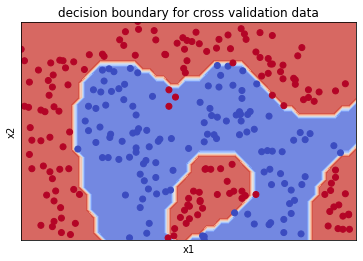

In [ ]:
#creating the meshgrid by finding specifing the minimum and maximum values of both x1 and x2
x1_min, x1_max = x1_cross.min() , x1_cross.max() 
x2_min, x2_max = x2_cross.min() , x2_cross.max() 
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max,0.02),np.arange(x2_min, x2_max,0.02))
predict = gridclf.predict(np.c_[xx1.ravel(), xx2.ravel()])
predict = predict.reshape(xx1.shape)
#creating the regions using countor lines
pp.contourf(xx1,xx2 ,predict, cmap=pp.cm.coolwarm, alpha=0.8)
#scattering the testing data
pp.scatter(x1_cross, x2_cross, c=y_cross, cmap=pp.cm.coolwarm)
pp.xlabel('x1')
pp.ylabel('x2')
pp.xlim(xx1.min(), xx1.max())
pp.ylim(xx2.min(), xx2.max())
pp.xticks(())
pp.yticks(())
pp.title('decision boundary for cross validation data')